# 模型复杂对随序列长度的增长


Configuration 0: L=500, D=256, k=2, heads=4
Complexity Breakdown:
- Self Attention: 0.522 GFLOPS
- Add & Norm: 0.002 GFLOPS
- FFN: 0.262 GFLOPS
Total Complexity: 0.786 GFLOPS

Configuration 1: L=600, D=256, k=2, heads=4
Complexity Breakdown:
- Self Attention: 0.689 GFLOPS
- Add & Norm: 0.002 GFLOPS
- FFN: 0.315 GFLOPS
Total Complexity: 1.006 GFLOPS

Configuration 2: L=720, D=256, k=2, heads=4
Complexity Breakdown:
- Self Attention: 0.917 GFLOPS
- Add & Norm: 0.003 GFLOPS
- FFN: 0.378 GFLOPS
Total Complexity: 1.297 GFLOPS

Configuration 3: L=863, D=256, k=2, heads=4
Complexity Breakdown:
- Self Attention: 1.227 GFLOPS
- Add & Norm: 0.003 GFLOPS
- FFN: 0.453 GFLOPS
Total Complexity: 1.683 GFLOPS

Configuration 4: L=1036, D=256, k=2, heads=4
Complexity Breakdown:
- Self Attention: 1.659 GFLOPS
- Add & Norm: 0.004 GFLOPS
- FFN: 0.544 GFLOPS
Total Complexity: 2.207 GFLOPS

Configuration 5: L=1244, D=256, k=2, heads=4
Complexity Breakdown:
- Self Attention: 2.262 GFLOPS
- Add & Norm: 0.004 

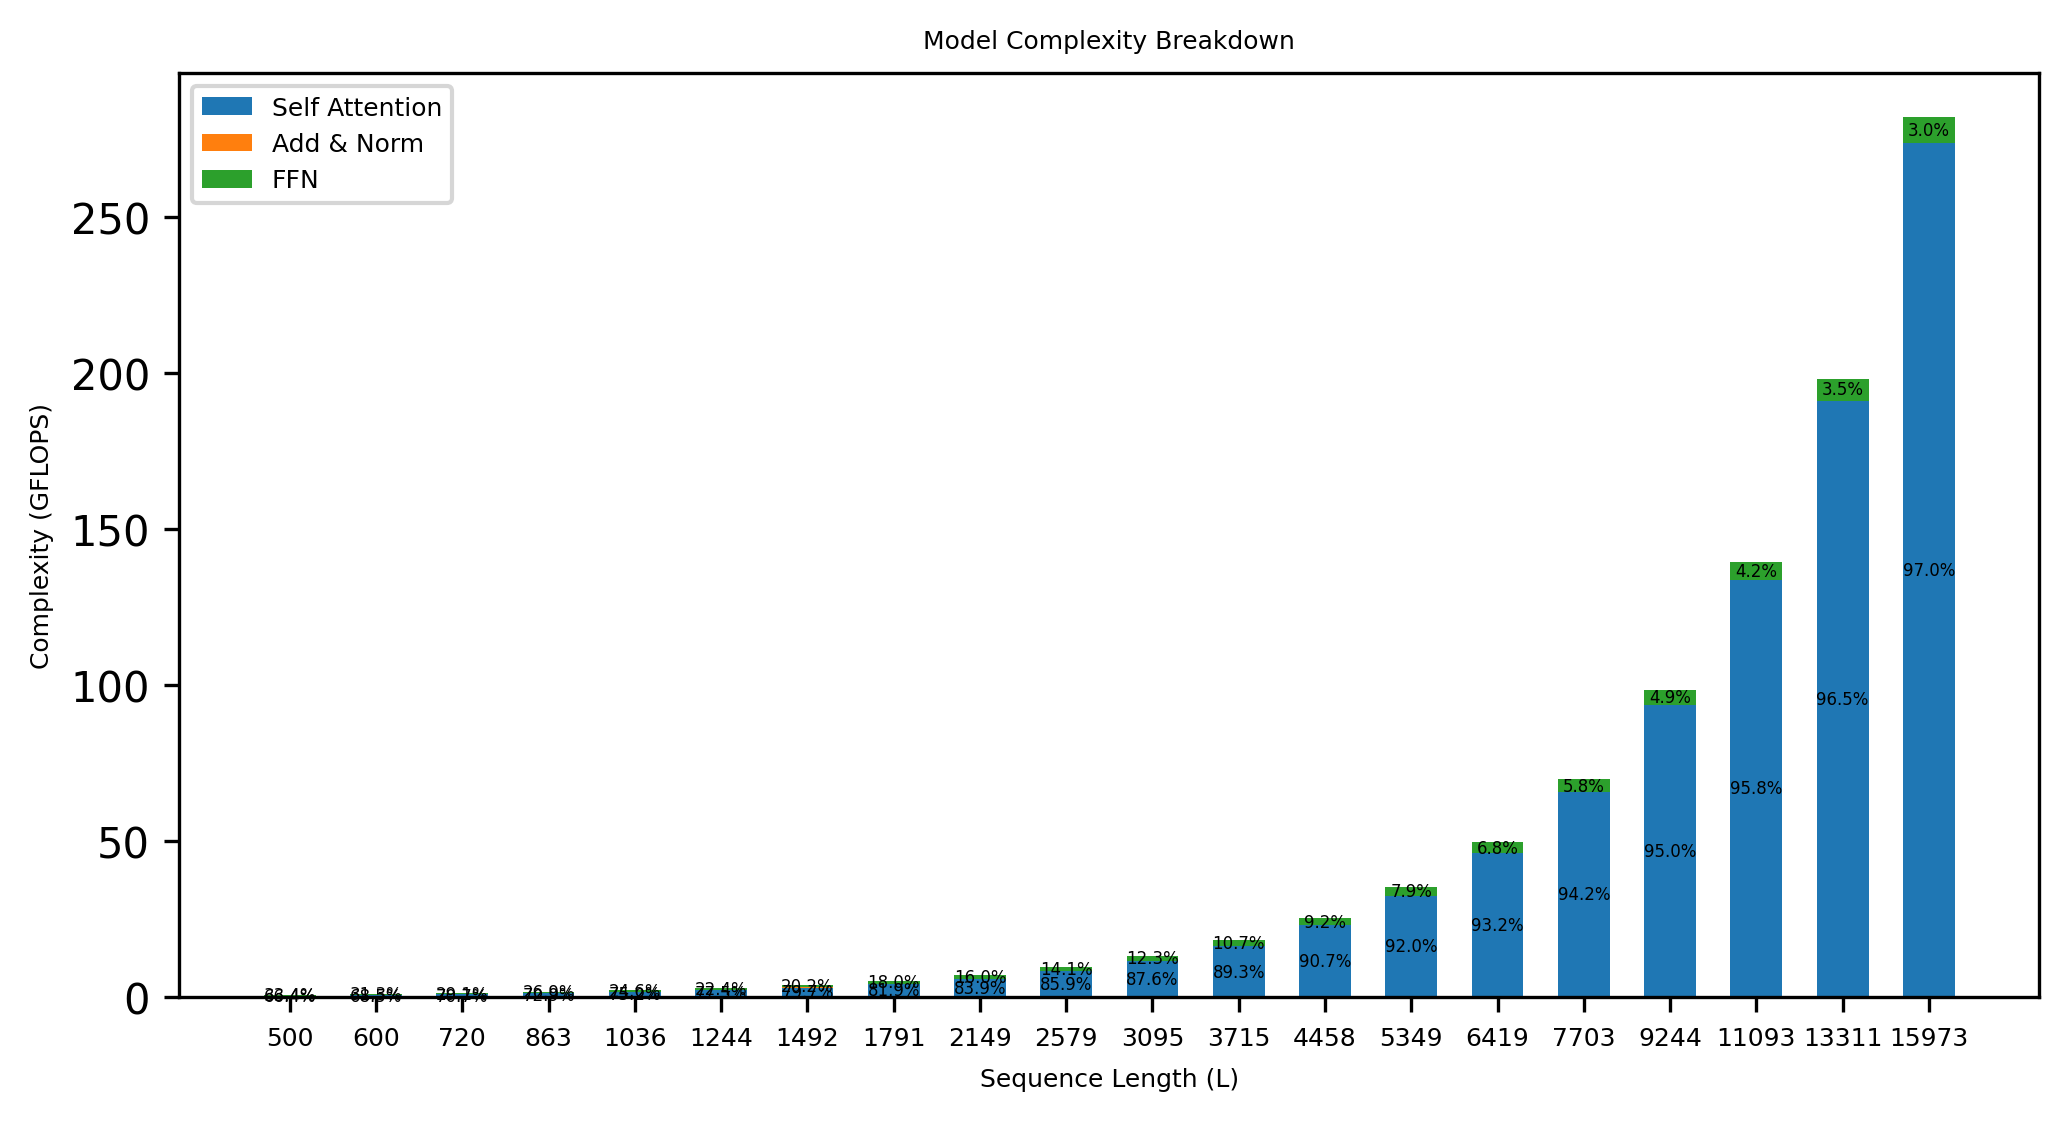

In [65]:
import matplotlib.pyplot as plt

def self_attention_complexity(L, D, h):
    """Calculates the complexity of the Self Attention module."""
    return 8 * L * D**2 + 4 * L**2 * D + 4 * h * L**2

def add_norm_1_complexity(L, D):
    """Calculates the complexity of the first Add & Norm module."""
    return 7 * L * D

def ffn_complexity(L, D, k):
    """Calculates the complexity of the FFN module."""
    return 4 * k * L * D**2 + k * L * D

def add_norm_2_complexity(L, D):
    """Calculates the complexity of the second Add & Norm module."""
    return 7 * L * D

def get_complexity_breakdown(L, D, k, h):
    """
    Calculates the computational complexity for each part of the model.

    Args:
        L (int): Sequence length.
        D (int): Hidden dimension.
        k (int): Intermediate dimension multiplier for FFN.
        h (int): Number of attention heads.

    Returns:
        dict: A dictionary containing the complexity of each module.
    """
    complexities = {
        "Self Attention": self_attention_complexity(L, D, h),
        "Add & Norm": add_norm_1_complexity(L, D)+add_norm_2_complexity(L, D),
        "FFN": ffn_complexity(L, D, k),
    }
    return complexities

def get_complexity_lists(L_list, D_list, k_list, h_list):
    """
    计算多组参数下各模块的计算复杂度列表

    Args:
        L_list (list): 序列长度列表
        D_list (list): 隐藏维度列表
        k_list (list): FFN中间维度乘数列表
        h_list (list): 注意力头数列表

    Returns:
        tuple: 包含Self Attention、Add & Norm、FFN复杂度列表以及总复杂度列表
    """
    self_attn_list = []
    add_norm_list = []
    ffn_list = []
    total_list = []
    
    for L, D, k, h in zip(L_list, D_list, k_list, h_list):
        breakdown = get_complexity_breakdown(L, D, k, h)
        self_attn_list.append(breakdown["Self Attention"] / 1e9)  # 转换为GFLOPS
        add_norm_list.append(breakdown["Add & Norm"] / 1e9)      # 转换为GFLOPS
        ffn_list.append(breakdown["FFN"] / 1e9)                  # 转换为GFLOPS
        total_list.append(sum(breakdown.values()) / 1e9)         # 转换为GFLOPS
    
    return self_attn_list, add_norm_list, ffn_list, total_list

def plot_complexity_breakdown(L_list, D_list, k_list, h_list):
    """
    绘制柱状图展示多组参数下的计算复杂度分解

    Args:
        L_list (list): 序列长度列表
        D_list (list): 隐藏维度列表
        k_list (list): FFN中间维度乘数列表
        h_list (list): 注意力头数列表
    """
    self_attn, add_norm, ffn, total = get_complexity_lists(L_list, D_list, k_list, h_list)
    x = range(len(L_list))
    width = 0.6  # 固定柱状图宽度
    
    fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
    bottom = [0] * len(x)
    modules = [self_attn, add_norm, ffn]
    labels = ['Self Attention', 'Add & Norm', 'FFN']
    
    for i, (module, label) in enumerate(zip(modules, labels)):
        bars = ax.bar(x, module, width, label=label, bottom=bottom)
        # 在每个柱子上显示百分比
        for idx, bar in enumerate(bars):
            if total[idx] > 0:
                percent = (module[idx] / total[idx]) * 100
                # 不显示Add & Norm部分的数字，数字颜色调整为黑色
                if label != 'Add & Norm':
                    ax.text(bar.get_x() + bar.get_width() / 2, 
                            bottom[idx] + bar.get_height() / 2,
                            f'{percent:.1f}%',
                            ha='center', va='center', fontsize=4, color='black')
        bottom = [b + m for b, m in zip(bottom, module)]
    
    ax.set_xlabel('Sequence Length (L)', fontsize=6)
    ax.set_ylabel('Complexity (GFLOPS)', fontsize=6)
    ax.set_title('Model Complexity Breakdown', fontsize=6)
    ax.legend(fontsize=6)
    
    plt.xticks(x, L_list, fontsize=6)
    plt.show()

def print_complexity_results(L_list, D_list, k_list, h_list):
    """
    打印多组参数下的计算复杂度分解和总复杂度

    Args:
        L_list (list): 序列长度列表
        D_list (list): 隐藏维度列表
        k_list (list): FFN中间维度乘数列表
        h_list (list): 注意力头数列表
    """
    self_attn, add_norm, ffn, total = get_complexity_lists(L_list, D_list, k_list, h_list)
    
    for i in range(len(L_list)):
        print(f"\nConfiguration {i}: L={L_list[i]}, D={D_list[i]}, k={k_list[i]}, heads={h_list[i]}")
        print("Complexity Breakdown:")
        print(f"- Self Attention: {self_attn[i]:.3f} GFLOPS")
        print(f"- Add & Norm: {add_norm[i]:.3f} GFLOPS")
        print(f"- FFN: {ffn[i]:.3f} GFLOPS")
        print(f"Total Complexity: {total[i]:.3f} GFLOPS")

def main(L_list, D_list, k_list, h_list):
    """
    主函数，计算并打印多组参数下的复杂度分解和总复杂度，然后绘制柱状图

    Args:
        L_list (list): 序列长度列表
        D_list (list): 隐藏维度列表
        k_list (list): FFN中间维度乘数列表
        h_list (list): 注意力头数列表
    """
    print_complexity_results(L_list, D_list, k_list, h_list)
    plot_complexity_breakdown(L_list, D_list, k_list, h_list)

# --- Example Usage ---
if __name__ == "__main__":
    # You can change these values to test with different model configurations
    length = 20
    L_val = list(int(500 * (1.2**i)) for i in range(length))  # Example Sequence Length
    D_val = list(256 for _ in range(length))     # Example Hidden Dimension
    k_val = list(2 for _ in range(length))          # Example FFN Multiplier
    h_val = list(4 for _ in range(length))          # Example Number of Heads
    
    main(L_val, D_val, k_val, h_val)

# 模型复杂度随模型维度的增长


Configuration 0: L=4000, D=64, k=2, heads=4
Complexity Breakdown:
- Self Attention: 4.483 GFLOPS
- Add & Norm: 0.004 GFLOPS
- FFN: 0.132 GFLOPS
Total Complexity: 4.618 GFLOPS

Configuration 1: L=4000, D=87, k=2, heads=4
Complexity Breakdown:
- Self Attention: 6.066 GFLOPS
- Add & Norm: 0.005 GFLOPS
- FFN: 0.243 GFLOPS
Total Complexity: 6.314 GFLOPS

Configuration 2: L=4000, D=111, k=2, heads=4
Complexity Breakdown:
- Self Attention: 7.754 GFLOPS
- Add & Norm: 0.006 GFLOPS
- FFN: 0.395 GFLOPS
Total Complexity: 8.156 GFLOPS

Configuration 3: L=4000, D=134, k=2, heads=4
Complexity Breakdown:
- Self Attention: 9.407 GFLOPS
- Add & Norm: 0.008 GFLOPS
- FFN: 0.576 GFLOPS
Total Complexity: 9.990 GFLOPS

Configuration 4: L=4000, D=158, k=2, heads=4
Complexity Breakdown:
- Self Attention: 11.167 GFLOPS
- Add & Norm: 0.009 GFLOPS
- FFN: 0.800 GFLOPS
Total Complexity: 11.976 GFLOPS

Configuration 5: L=4000, D=181, k=2, heads=4
Complexity Breakdown:
- Self Attention: 12.888 GFLOPS
- Add & Norm: 0

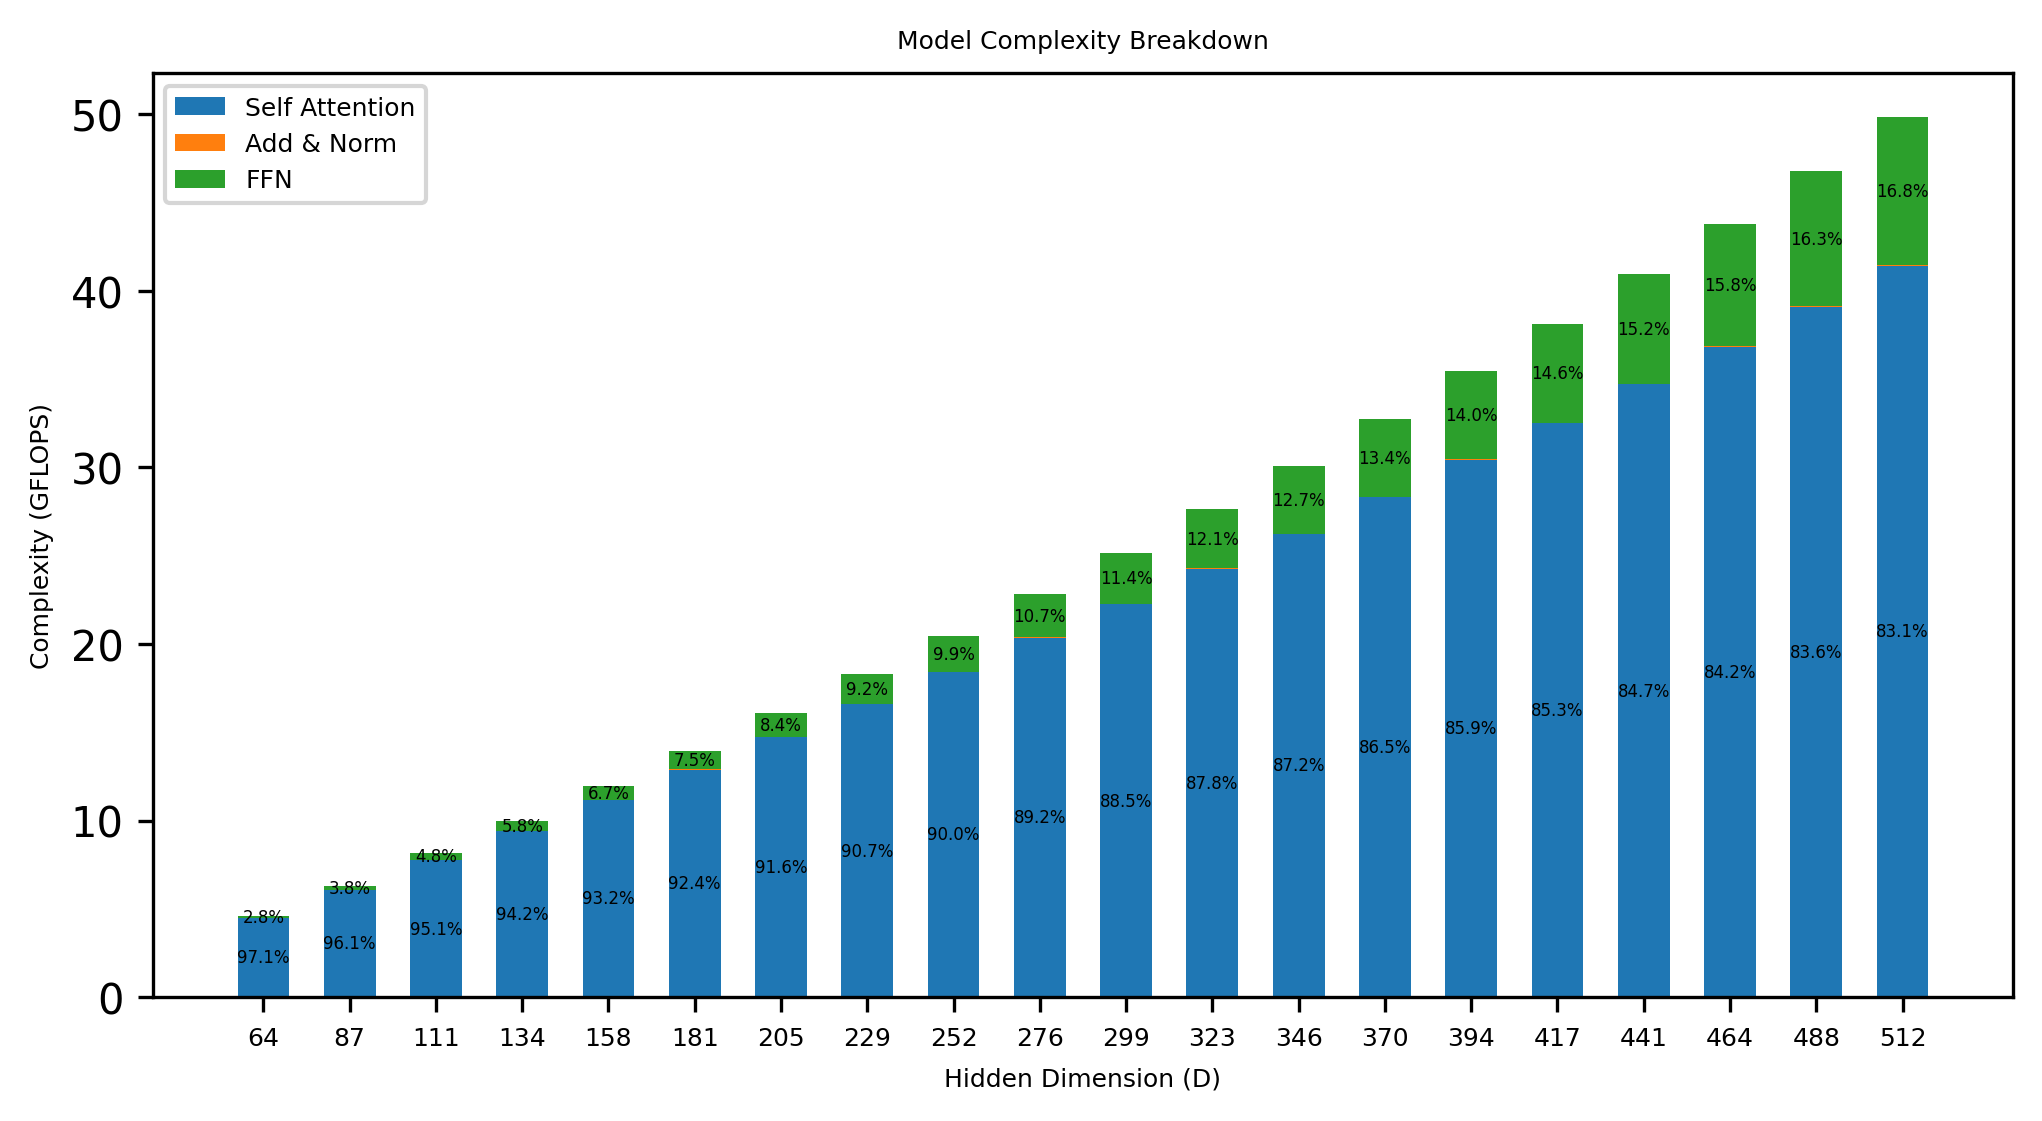

In [66]:
import matplotlib.pyplot as plt

def self_attention_complexity(L, D, h):
    """Calculates the complexity of the Self Attention module."""
    return 8 * L * D**2 + 4 * L**2 * D + 4 * h * L**2

def add_norm_1_complexity(L, D):
    """Calculates the complexity of the first Add & Norm module."""
    return 7 * L * D

def ffn_complexity(L, D, k):
    """Calculates the complexity of the FFN module."""
    return 4 * k * L * D**2 + k * L * D

def add_norm_2_complexity(L, D):
    """Calculates the complexity of the second Add & Norm module."""
    return 7 * L * D

def get_complexity_breakdown(L, D, k, h):
    """
    Calculates the computational complexity for each part of the model.

    Args:
        L (int): Sequence length.
        D (int): Hidden dimension.
        k (int): Intermediate dimension multiplier for FFN.
        h (int): Number of attention heads.

    Returns:
        dict: A dictionary containing the complexity of each module.
    """
    complexities = {
        "Self Attention": self_attention_complexity(L, D, h),
        "Add & Norm": add_norm_1_complexity(L, D)+add_norm_2_complexity(L, D),
        "FFN": ffn_complexity(L, D, k),
    }
    return complexities

def get_complexity_lists(L_list, D_list, k_list, h_list):
    """
    计算多组参数下各模块的计算复杂度列表

    Args:
        L_list (list): 序列长度列表
        D_list (list): 隐藏维度列表
        k_list (list): FFN中间维度乘数列表
        h_list (list): 注意力头数列表

    Returns:
        tuple: 包含Self Attention、Add & Norm、FFN复杂度列表以及总复杂度列表
    """
    self_attn_list = []
    add_norm_list = []
    ffn_list = []
    total_list = []
    
    for L, D, k, h in zip(L_list, D_list, k_list, h_list):
        breakdown = get_complexity_breakdown(L, D, k, h)
        self_attn_list.append(breakdown["Self Attention"] / 1e9)  # 转换为GFLOPS
        add_norm_list.append(breakdown["Add & Norm"] / 1e9)      # 转换为GFLOPS
        ffn_list.append(breakdown["FFN"] / 1e9)                  # 转换为GFLOPS
        total_list.append(sum(breakdown.values()) / 1e9)         # 转换为GFLOPS
    
    return self_attn_list, add_norm_list, ffn_list, total_list

def plot_complexity_breakdown(L_list, D_list, k_list, h_list):
    """
    绘制柱状图展示多组参数下的计算复杂度分解

    Args:
        L_list (list): 序列长度列表
        D_list (list): 隐藏维度列表
        k_list (list): FFN中间维度乘数列表
        h_list (list): 注意力头数列表
    """
    self_attn, add_norm, ffn, total = get_complexity_lists(L_list, D_list, k_list, h_list)
    x = range(len(D_list))  # 修改为以D的数量为x轴索引
    width = 0.6  # 固定柱状图宽度
    
    fig, ax = plt.subplots(figsize=(8, 4), dpi=300)
    bottom = [0] * len(x)
    modules = [self_attn, add_norm, ffn]
    labels = ['Self Attention', 'Add & Norm', 'FFN']
    
    for i, (module, label) in enumerate(zip(modules, labels)):
        bars = ax.bar(x, module, width, label=label, bottom=bottom)
        # 在每个柱子上显示百分比
        for idx, bar in enumerate(bars):
            if total[idx] > 0:
                percent = (module[idx] / total[idx]) * 100
                # 不显示Add & Norm部分的数字，数字颜色调整为黑色
                if label != 'Add & Norm':
                    ax.text(bar.get_x() + bar.get_width() / 2, 
                            bottom[idx] + bar.get_height() / 2,
                            f'{percent:.1f}%',
                            ha='center', va='center', fontsize=4, color='black')
        bottom = [b + m for b, m in zip(bottom, module)]
    
    ax.set_xlabel('Hidden Dimension (D)', fontsize=6)  # 修改x轴标签
    ax.set_ylabel('Complexity (GFLOPS)', fontsize=6)
    ax.set_title('Model Complexity Breakdown', fontsize=6)
    ax.legend(fontsize=6)
    
    plt.xticks(x, D_list, fontsize=6)  # 修改x轴刻度为D的值
    plt.show()

def print_complexity_results(L_list, D_list, k_list, h_list):
    """
    打印多组参数下的计算复杂度分解和总复杂度

    Args:
        L_list (list): 序列长度列表
        D_list (list): 隐藏维度列表
        k_list (list): FFN中间维度乘数列表
        h_list (list): 注意力头数列表
    """
    self_attn, add_norm, ffn, total = get_complexity_lists(L_list, D_list, k_list, h_list)
    
    for i in range(len(L_list)):
        print(f"\nConfiguration {i}: L={L_list[i]}, D={D_list[i]}, k={k_list[i]}, heads={h_list[i]}")
        print("Complexity Breakdown:")
        print(f"- Self Attention: {self_attn[i]:.3f} GFLOPS")
        print(f"- Add & Norm: {add_norm[i]:.3f} GFLOPS")
        print(f"- FFN: {ffn[i]:.3f} GFLOPS")
        print(f"Total Complexity: {total[i]:.3f} GFLOPS")

def main(L_list, D_list, k_list, h_list):
    """
    主函数，计算并打印多组参数下的复杂度分解和总复杂度，然后绘制柱状图

    Args:
        L_list (list): 序列长度列表
        D_list (list): 隐藏维度列表
        k_list (list): FFN中间维度乘数列表
        h_list (list): 注意力头数列表
    """
    print_complexity_results(L_list, D_list, k_list, h_list)
    plot_complexity_breakdown(L_list, D_list, k_list, h_list)

# --- Example Usage ---
if __name__ == "__main__":
    # 固定L=4000，D从64到512等比例增长，取20个值
    length = 20
    L_val = [4000] * length  # 固定L为4000
    D_val = [int(64 + i * (512 - 64) / (length - 1)) for i in range(length)]  # D从64到512等比例增长
    k_val = [2] * length  # 固定FFN乘数为2
    h_val = [4] * length  # 固定注意力头数为4
    
    main(L_val, D_val, k_val, h_val)

# Transformer对比Swin-Transformer在计算复杂度上的影响
## 固定其余参数，只改变Swin重建的子序列长度（子序列数量）
$Self-Attention = Softmax(\frac{QK^T}{\sqrt{d_k}})V$


Configuration with 2 subsequences: L=10000, D=128, k=2, heads=4
Vanilla Transformer Complexity Breakdown:
- Self Attention: 54.111 GFLOPS
- Add & Norm: 0.018 GFLOPS
- FFN: 1.313 GFLOPS
Total Complexity: 55.442 GFLOPS

Swin Transformer Complexity Breakdown:
- Self Attention: 55.421 GFLOPS
- Add & Norm: 0.036 GFLOPS
- FFN: 2.627 GFLOPS
Total Complexity: 58.084 GFLOPS

Configuration with 4 subsequences: L=10000, D=128, k=2, heads=4
Vanilla Transformer Complexity Breakdown:
- Self Attention: 54.111 GFLOPS
- Add & Norm: 0.018 GFLOPS
- FFN: 1.313 GFLOPS
Total Complexity: 55.442 GFLOPS

Swin Transformer Complexity Breakdown:
- Self Attention: 29.021 GFLOPS
- Add & Norm: 0.036 GFLOPS
- FFN: 2.627 GFLOPS
Total Complexity: 31.684 GFLOPS

Configuration with 8 subsequences: L=10000, D=128, k=2, heads=4
Vanilla Transformer Complexity Breakdown:
- Self Attention: 54.111 GFLOPS
- Add & Norm: 0.018 GFLOPS
- FFN: 1.313 GFLOPS
Total Complexity: 55.442 GFLOPS

Swin Transformer Complexity Breakdown:
- Se

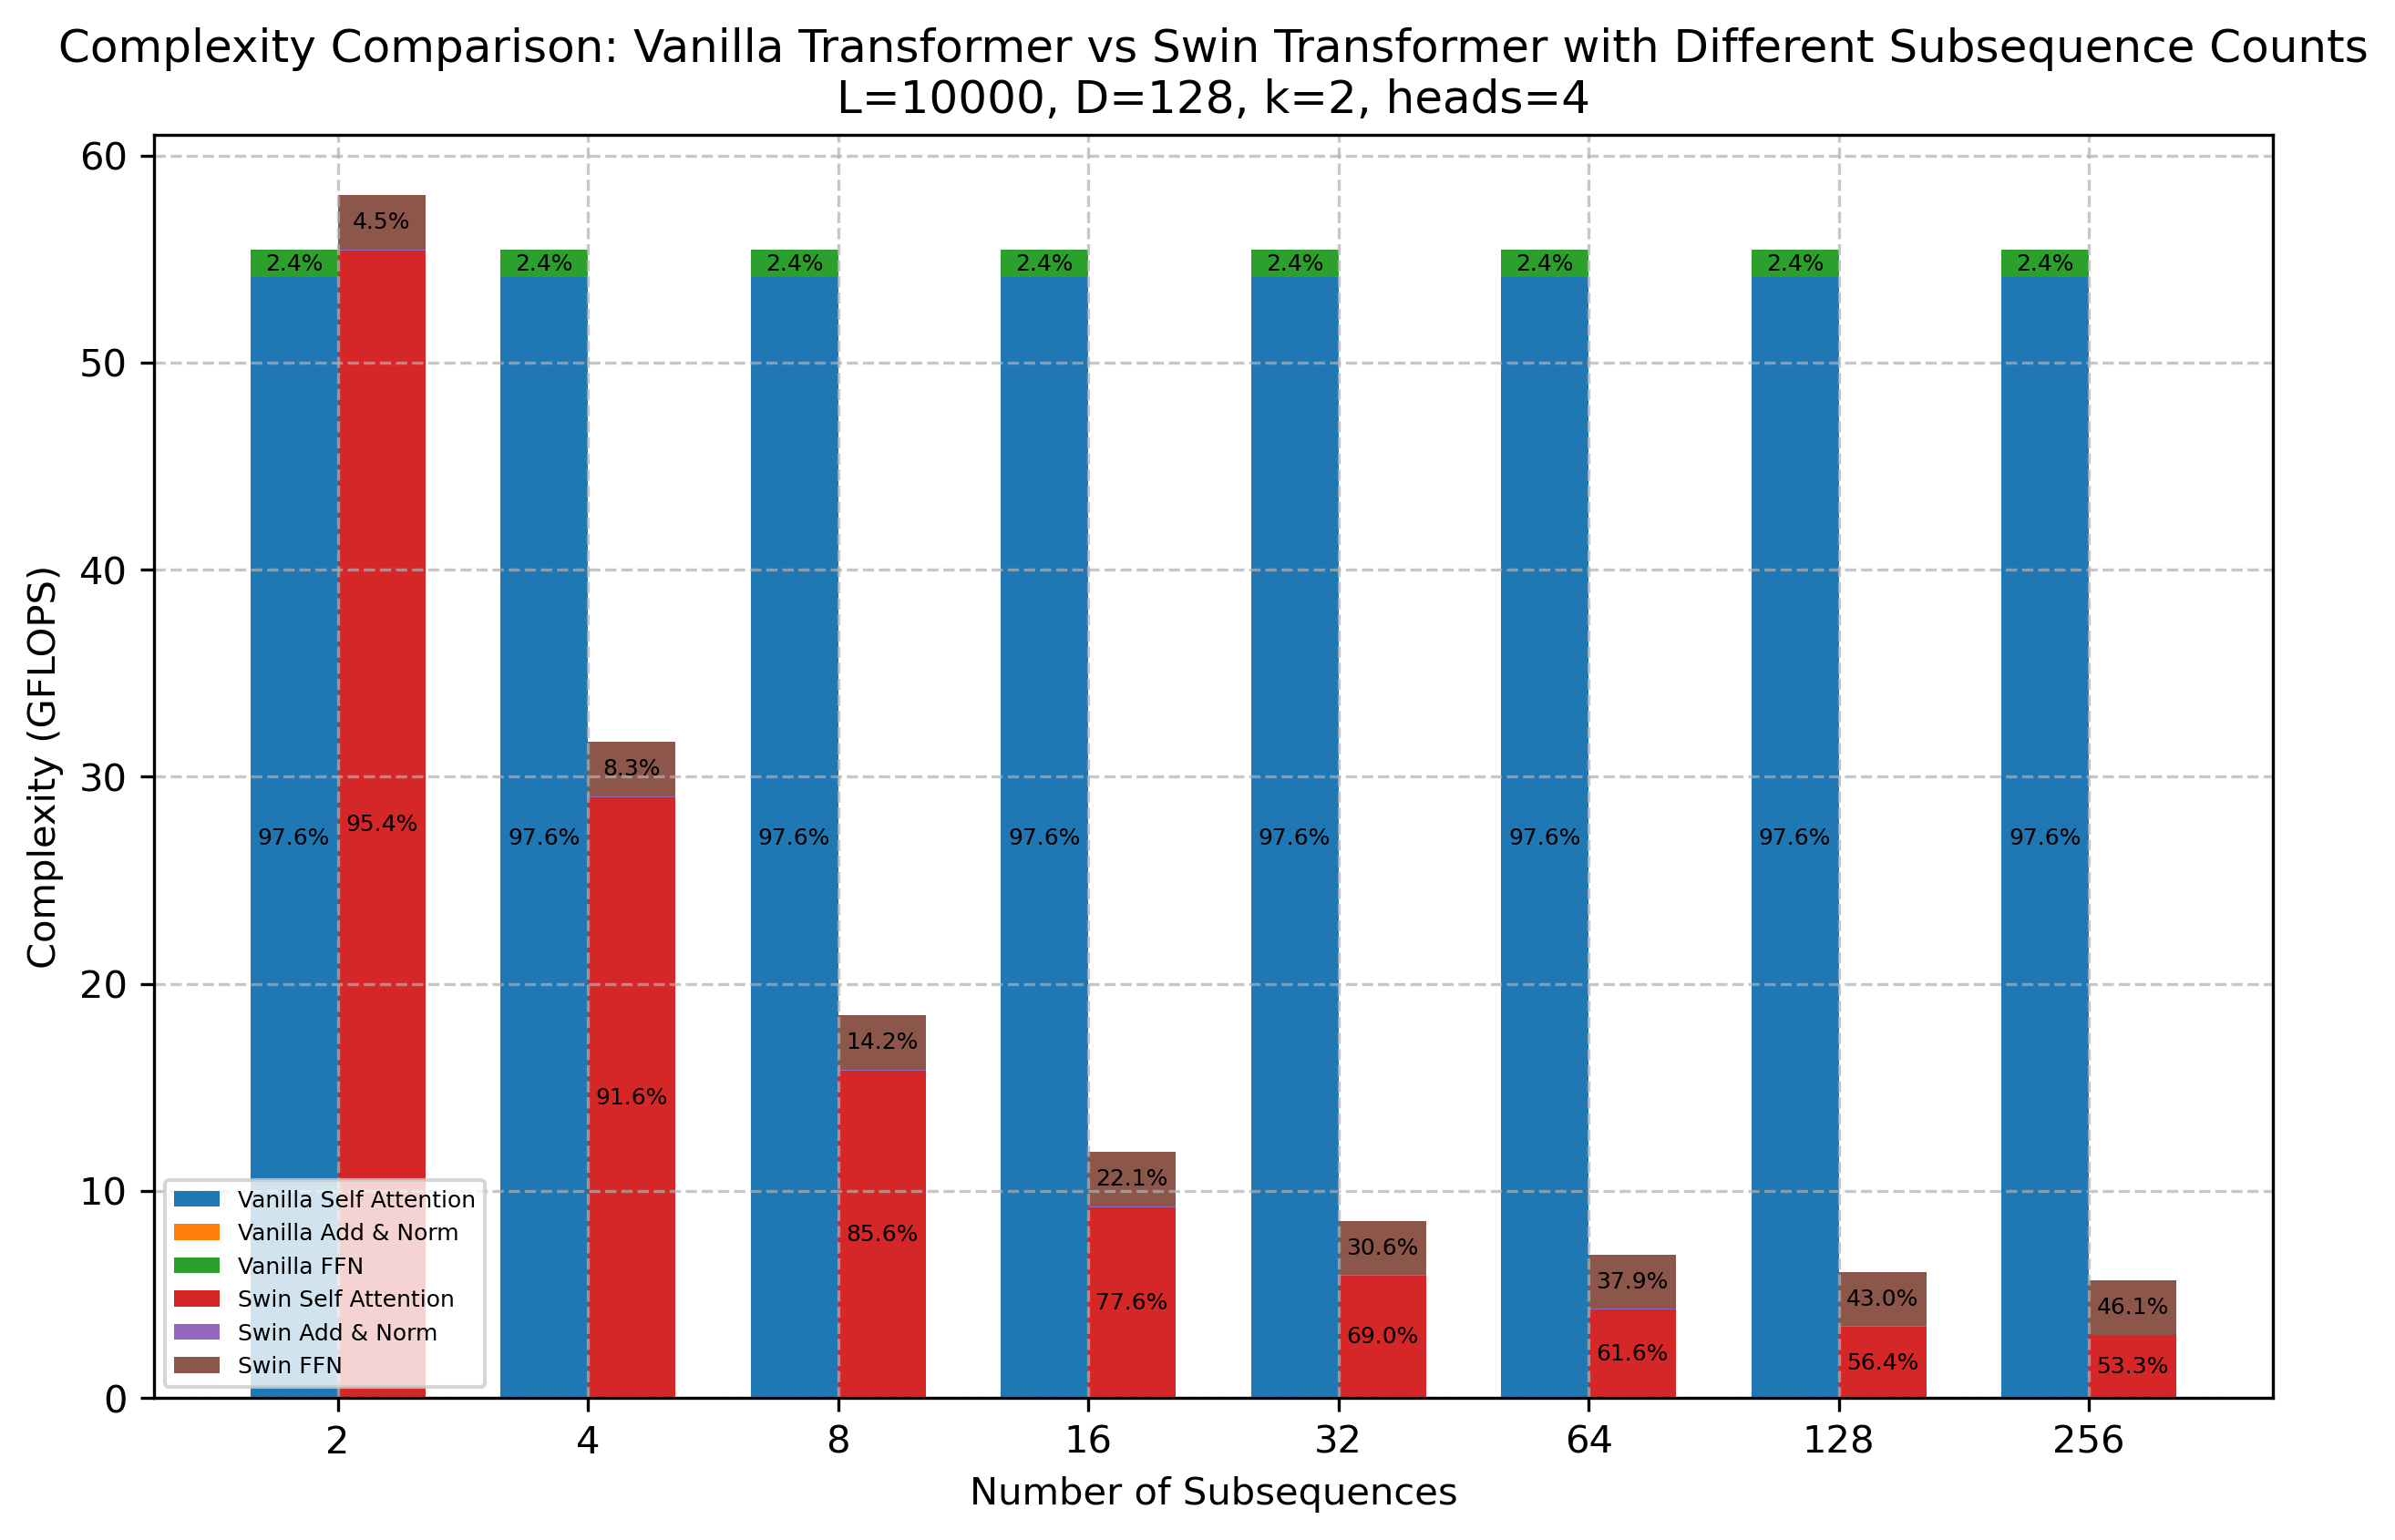

In [1]:
import matplotlib.pyplot as plt

def self_attention_complexity(L, D, h):
    """Calculates the complexity of the Self Attention module."""
    return 8 * L * D**2 + 4 * L**2 * D + 4 * h * L**2

def add_norm_1_complexity(L, D):
    """Calculates the complexity of the first Add & Norm module."""
    return 7 * L * D

def ffn_complexity(L, D, k):
    """Calculates the complexity of the FFN module."""
    return 4 * k * L * D**2 + k * L * D

def add_norm_2_complexity(L, D):
    """Calculates the complexity of the second Add & Norm module."""
    return 7 * L * D

def get_complexity_breakdown(L, D, k, h):
    """
    Calculates the computational complexity for each part of the model.

    Args:
        L (int): Sequence length.
        D (int): Hidden dimension.
        k (int): Intermediate dimension multiplier for FFN.
        h (int): Number of attention heads.

    Returns:
        dict: A dictionary containing the complexity of each module.
    """
    complexities = {
        "Self Attention": self_attention_complexity(L, D, h),
        "Add & Norm": add_norm_1_complexity(L, D)+add_norm_2_complexity(L, D),
        "FFN": ffn_complexity(L, D, k),
    }
    return complexities

def get_swin_complexity_breakdown(L, D, k, h, num_sub):
    """
    计算Swin Transformer的计算复杂度。将序列长度拆分成num_sub个子序列，使用两层transformer替代一层。

    Args:
        L (int): 序列长度。
        D (int): 隐藏维度。
        k (int): FFN中间维度乘数。
        h (int): 注意力头数。
        num_sub (int): 子序列数量。

    Returns:
        dict: 包含Swin Transformer各模块复杂度的字典。
    """
    sub_L = L // num_sub
    # 两层transformer
    self_attn = 2 * self_attention_complexity(sub_L, D, h) * num_sub
    add_norm = 2 * (add_norm_1_complexity(sub_L, D) + add_norm_2_complexity(sub_L, D)) * num_sub
    ffn = 2 * ffn_complexity(sub_L, D, k) * num_sub
    
    return {
        "Self Attention": self_attn,
        "Add & Norm": add_norm,
        "FFN": ffn
    }

def get_complexity_lists_fixed_vanilla(L, D, k, h, num_sub_list):
    """
    固定基础Transformer参数，通过改变Swin Transformer的子序列数量计算复杂度列表

    Args:
        L (int): 固定的序列长度
        D (int): 固定的隐藏维度
        k (int): 固定的FFN中间维度乘数
        h (int): 固定的注意力头数
        num_sub_list (list): Swin Transformer子序列数量列表

    Returns:
        tuple: 包含普通Transformer和Swin Transformer的Self Attention、Add & Norm、FFN复杂度列表以及总复杂度列表
    """
    # 计算一次普通Transformer复杂度，因为参数固定
    vanilla_breakdown = get_complexity_breakdown(L, D, k, h)
    vanilla_self_attn = vanilla_breakdown["Self Attention"] / 1e9  # 转换为GFLOPS
    vanilla_add_norm = vanilla_breakdown["Add & Norm"] / 1e9      # 转换为GFLOPS
    vanilla_ffn = vanilla_breakdown["FFN"] / 1e9                  # 转换为GFLOPS
    vanilla_total = sum(vanilla_breakdown.values()) / 1e9         # 转换为GFLOPS
    
    # 复制普通Transformer复杂度到列表，长度与num_sub_list一致
    vanilla_self_attn_list = [vanilla_self_attn] * len(num_sub_list)
    vanilla_add_norm_list = [vanilla_add_norm] * len(num_sub_list)
    vanilla_ffn_list = [vanilla_ffn] * len(num_sub_list)
    vanilla_total_list = [vanilla_total] * len(num_sub_list)
    
    # Swin Transformer
    swin_self_attn_list = []
    swin_add_norm_list = []
    swin_ffn_list = []
    swin_total_list = []
    
    for num_sub in num_sub_list:
        # 计算Swin Transformer复杂度
        swin_breakdown = get_swin_complexity_breakdown(L, D, k, h, num_sub)
        swin_self_attn_list.append(swin_breakdown["Self Attention"] / 1e9)  # 转换为GFLOPS
        swin_add_norm_list.append(swin_breakdown["Add & Norm"] / 1e9)      # 转换为GFLOPS
        swin_ffn_list.append(swin_breakdown["FFN"] / 1e9)                  # 转换为GFLOPS
        swin_total_list.append(sum(swin_breakdown.values()) / 1e9)         # 转换为GFLOPS
    
    return (vanilla_self_attn_list, vanilla_add_norm_list, vanilla_ffn_list, vanilla_total_list,
            swin_self_attn_list, swin_add_norm_list, swin_ffn_list, swin_total_list)

def plot_complexity_breakdown_fixed_vanilla(L, D, k, h, num_sub_list):
    """
    固定基础Transformer参数，绘制柱状图对比不同子序列数量下Swin Transformer的计算复杂度

    Args:
        L (int): 固定的序列长度
        D (int): 固定的隐藏维度
        k (int): 固定的FFN中间维度乘数
        h (int): 固定的注意力头数
        num_sub_list (list): Swin Transformer子序列数量列表
    """
    (vanilla_self_attn, vanilla_add_norm, vanilla_ffn, vanilla_total,
     swin_self_attn, swin_add_norm, swin_ffn, swin_total) = get_complexity_lists_fixed_vanilla(L, D, k, h, num_sub_list)
    
    x = range(len(num_sub_list))
    width = 0.35  # 柱子宽度
    
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    
    # 普通Transformer
    bottom_vanilla = [0] * len(x)
    vanilla_modules = [vanilla_self_attn, vanilla_add_norm, vanilla_ffn]
    vanilla_labels = ['Vanilla Self Attention', 'Vanilla Add & Norm', 'Vanilla FFN']
    
    for i, (module, label) in enumerate(zip(vanilla_modules, vanilla_labels)):
        bars = ax.bar([pos - width/2 for pos in x], module, width, label=label, bottom=bottom_vanilla)
        # 在每个柱子上显示百分比
        for idx, bar in enumerate(bars):
            if vanilla_total[idx] > 0:
                percent = (module[idx] / vanilla_total[idx]) * 100
                # 不显示Add & Norm部分的数字，数字颜色调整为黑色
                if "Add & Norm" not in label:
                    ax.text(bar.get_x() + bar.get_width() / 2, 
                            bottom_vanilla[idx] + bar.get_height() / 2,
                            f'{percent:.1f}%',
                            ha='center', va='center', fontsize=6, color='black')
        bottom_vanilla = [b + m for b, m in zip(bottom_vanilla, module)]
    
    # Swin Transformer
    bottom_swin = [0] * len(x)
    swin_modules = [swin_self_attn, swin_add_norm, swin_ffn]
    swin_labels = ['Swin Self Attention', 'Swin Add & Norm', 'Swin FFN']
    
    for i, (module, label) in enumerate(zip(swin_modules, swin_labels)):
        bars = ax.bar([pos + width/2 for pos in x], module, width, label=label, bottom=bottom_swin)
        # 在每个柱子上显示百分比
        for idx, bar in enumerate(bars):
            if swin_total[idx] > 0:
                percent = (module[idx] / swin_total[idx]) * 100
                # 不显示Add & Norm部分的数字，数字颜色调整为黑色
                if "Add & Norm" not in label:
                    ax.text(bar.get_x() + bar.get_width() / 2, 
                            bottom_swin[idx] + bar.get_height() / 2,
                            f'{percent:.1f}%',
                            ha='center', va='center', fontsize=6, color='black')
        bottom_swin = [b + m for b, m in zip(bottom_swin, module)]
    
    ax.set_xlabel('Number of Subsequences')
    ax.set_ylabel('Complexity (GFLOPS)')
    ax.set_title(f'Complexity Comparison: Vanilla Transformer vs Swin Transformer with Different Subsequence Counts\nL={L}, D={D}, k={k}, heads={h}')
    ax.set_xticks(x)
    ax.set_xticklabels(num_sub_list)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=6)
    
    plt.show()

def print_complexity_results_fixed_vanilla(L, D, k, h, num_sub_list):
    """
    固定基础Transformer参数，打印不同子序列数量下Swin Transformer的计算复杂度分解和总复杂度

    Args:
        L (int): 固定的序列长度
        D (int): 固定的隐藏维度
        k (int): 固定的FFN中间维度乘数
        h (int): 固定的注意力头数
        num_sub_list (list): Swin Transformer子序列数量列表
    """
    (vanilla_self_attn, vanilla_add_norm, vanilla_ffn, vanilla_total,
     swin_self_attn, swin_add_norm, swin_ffn, swin_total) = get_complexity_lists_fixed_vanilla(L, D, k, h, num_sub_list)
    
    for i, num_sub in enumerate(num_sub_list):
        print(f"\nConfiguration with {num_sub} subsequences: L={L}, D={D}, k={k}, heads={h}")
        print("Vanilla Transformer Complexity Breakdown:")
        print(f"- Self Attention: {vanilla_self_attn[i]:.3f} GFLOPS")
        print(f"- Add & Norm: {vanilla_add_norm[i]:.3f} GFLOPS")
        print(f"- FFN: {vanilla_ffn[i]:.3f} GFLOPS")
        print(f"Total Complexity: {vanilla_total[i]:.3f} GFLOPS")
        
        print("\nSwin Transformer Complexity Breakdown:")
        print(f"- Self Attention: {swin_self_attn[i]:.3f} GFLOPS")
        print(f"- Add & Norm: {swin_add_norm[i]:.3f} GFLOPS")
        print(f"- FFN: {swin_ffn[i]:.3f} GFLOPS")
        print(f"Total Complexity: {swin_total[i]:.3f} GFLOPS")

def main_fixed_vanilla():
    """
    主函数，固定基础Transformer参数，计算并打印不同子序列数量下Swin Transformer的复杂度分解和总复杂度，然后绘制柱状图对比
    """
    L = 10000          # 固定序列长度
    D = 128           # 固定隐藏维度
    k = 2             # 固定FFN中间维度乘数
    h = 4             # 固定注意力头数
    num_sub_list = [2 ** i for i in range(1, 9)]  # Swin Transformer子序列数量列表
    
    print_complexity_results_fixed_vanilla(L, D, k, h, num_sub_list)
    plot_complexity_breakdown_fixed_vanilla(L, D, k, h, num_sub_list)

# --- Example Usage ---
if __name__ == "__main__":
    main_fixed_vanilla()



Configuration with ratio r=1: New L=4000, sub-sequence count=0, D=128, k=2, heads=4
Vanilla Transformer Complexity Breakdown:
- Self Attention: 8.972 GFLOPS
- Add & Norm: 0.007 GFLOPS
- FFN: 0.525 GFLOPS
Total Complexity: 9.505 GFLOPS

Swin Transformer Complexity Breakdown:
- Self Attention: 5.273 GFLOPS
- Add & Norm: 0.014 GFLOPS
- FFN: 1.051 GFLOPS
Total Complexity: 6.338 GFLOPS

Configuration with ratio r=2: New L=8000, sub-sequence count=0, D=128, k=2, heads=4
Vanilla Transformer Complexity Breakdown:
- Self Attention: 8.972 GFLOPS
- Add & Norm: 0.007 GFLOPS
- FFN: 0.525 GFLOPS
Total Complexity: 9.505 GFLOPS

Swin Transformer Complexity Breakdown:
- Self Attention: 6.321 GFLOPS
- Add & Norm: 0.029 GFLOPS
- FFN: 2.101 GFLOPS
Total Complexity: 8.451 GFLOPS

Configuration with ratio r=3: New L=12000, sub-sequence count=0, D=128, k=2, heads=4
Vanilla Transformer Complexity Breakdown:
- Self Attention: 8.972 GFLOPS
- Add & Norm: 0.007 GFLOPS
- FFN: 0.525 GFLOPS
Total Complexity: 9.505 

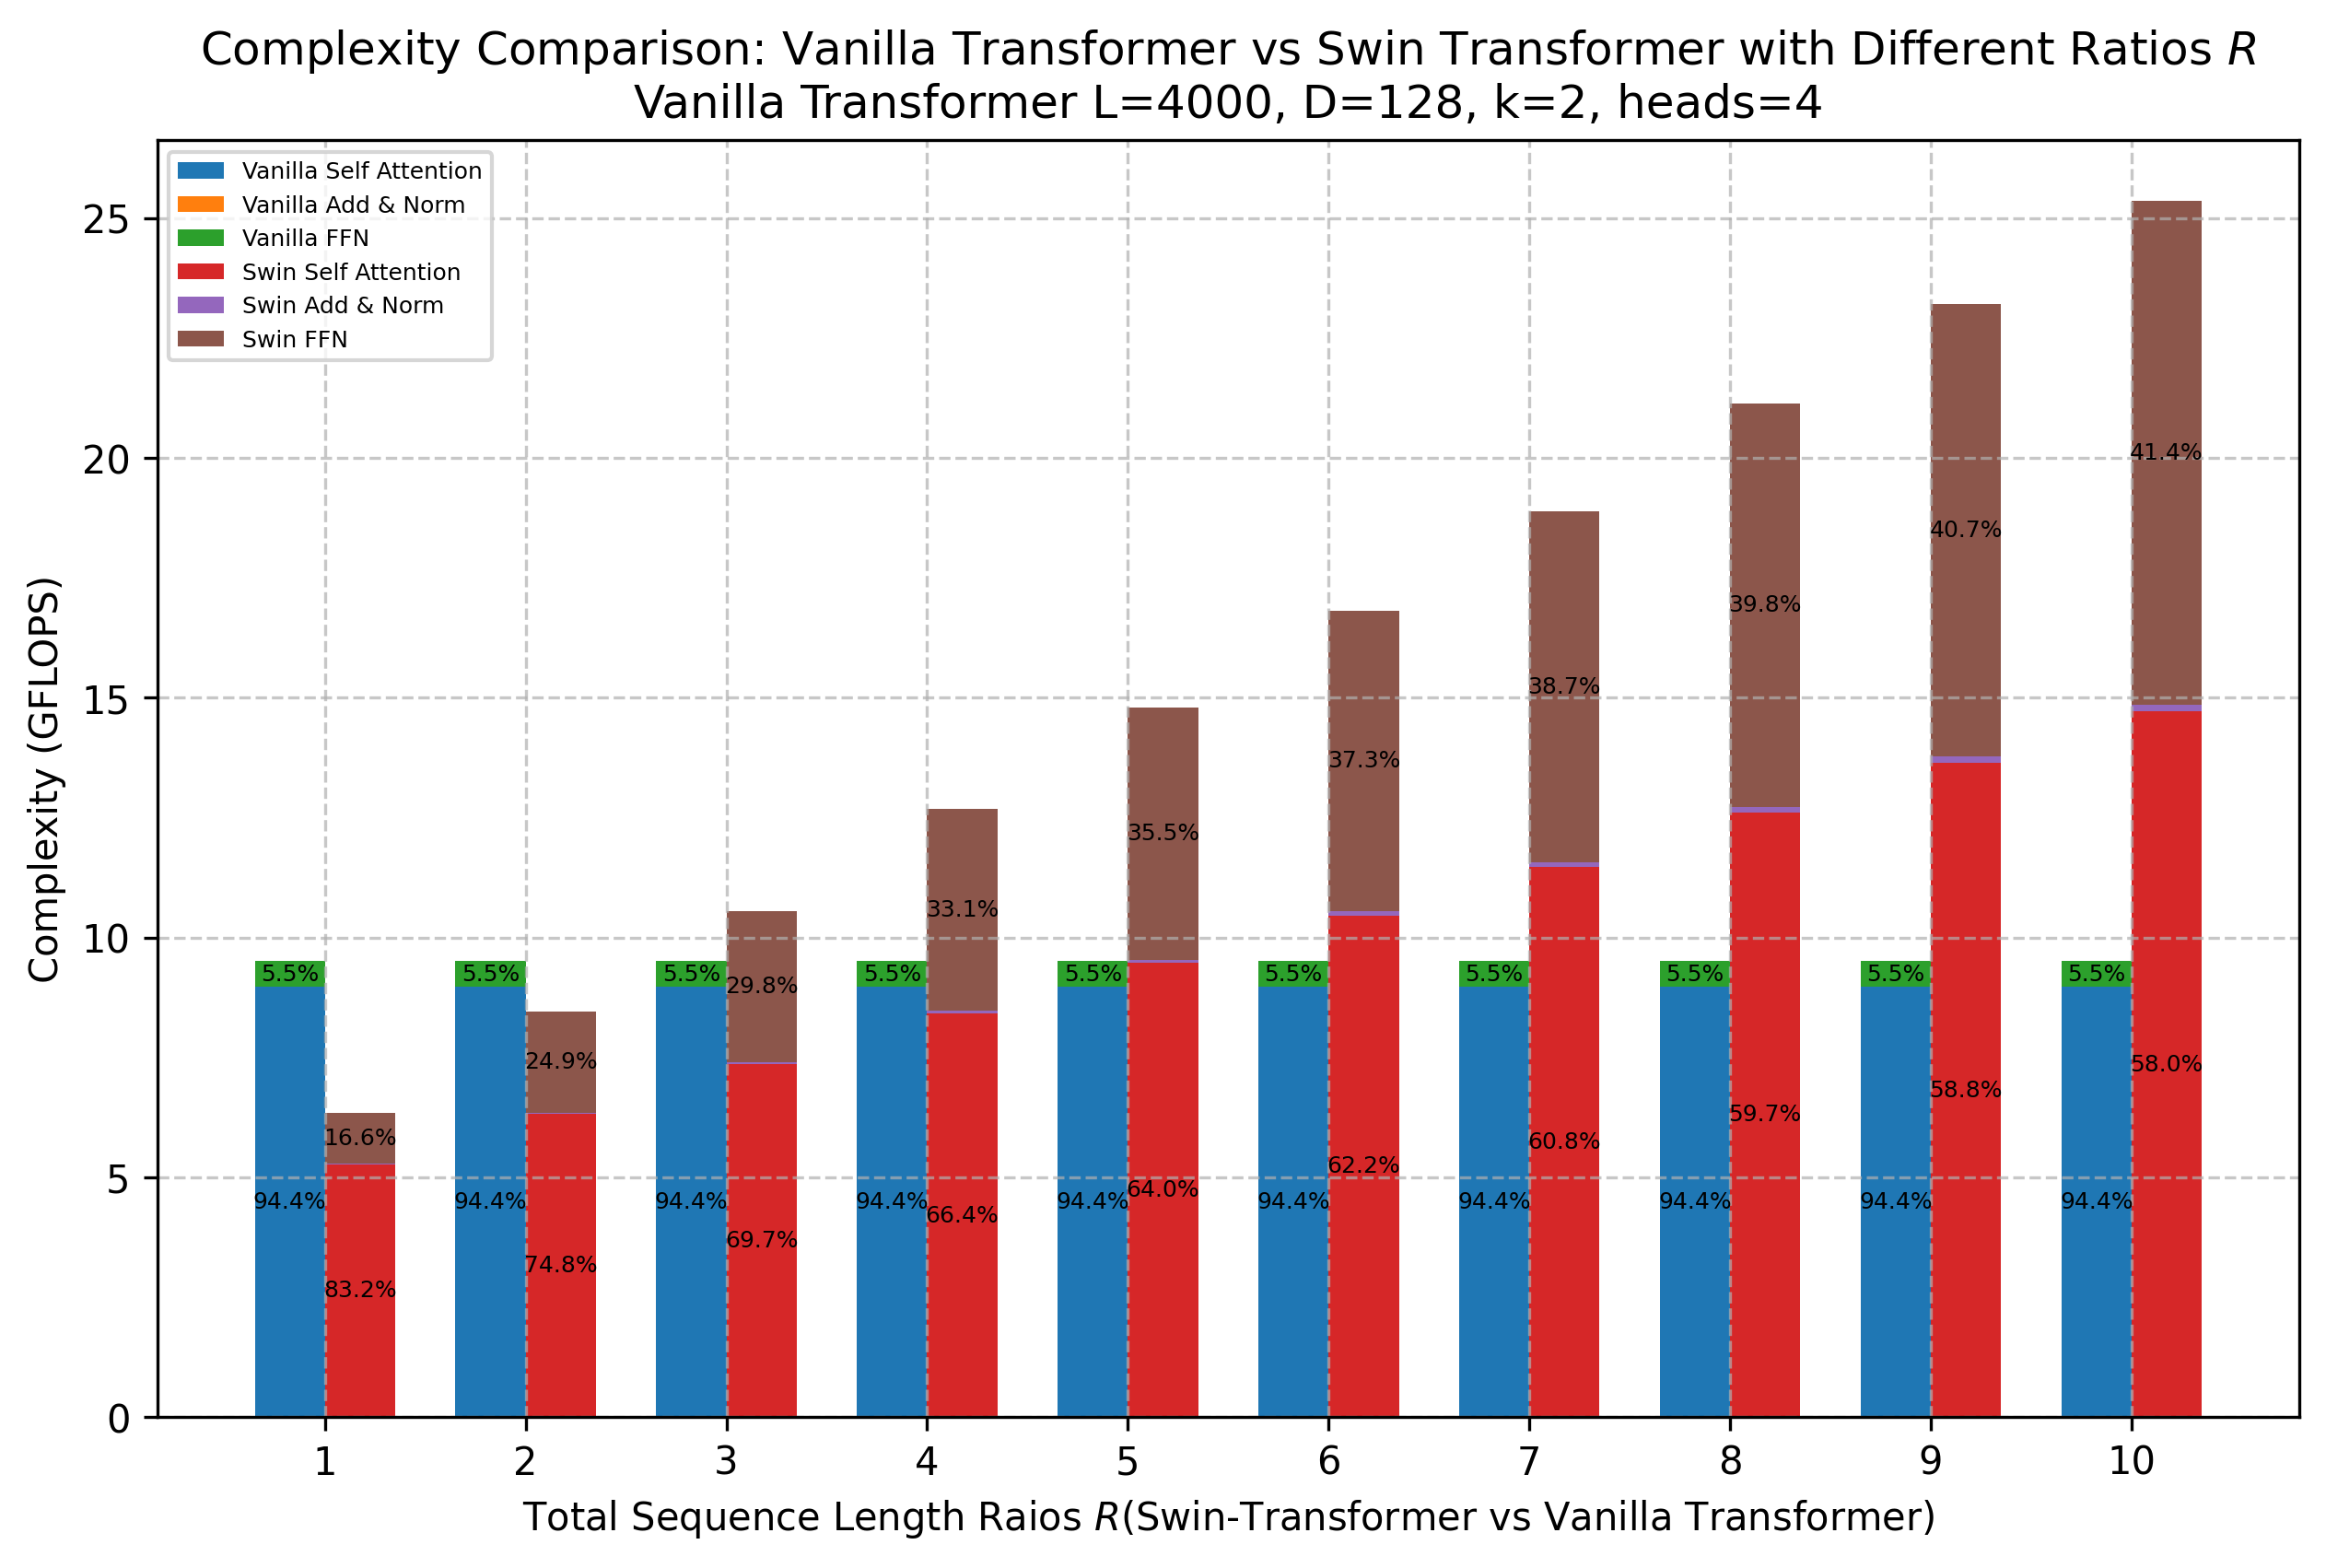

In [79]:
import matplotlib.pyplot as plt

def self_attention_complexity(L, D, h):
    """Calculates the complexity of the Self Attention module."""
    return 8 * L * D**2 + 4 * L**2 * D + 4 * h * L**2

def add_norm_1_complexity(L, D):
    """Calculates the complexity of the first Add & Norm module."""
    return 7 * L * D

def ffn_complexity(L, D, k):
    """Calculates the complexity of the FFN module."""
    return 4 * k * L * D**2 + k * L * D

def add_norm_2_complexity(L, D):
    """Calculates the complexity of the second Add & Norm module."""
    return 7 * L * D

def get_complexity_breakdown(L, D, k, h):
    """
    Calculates the computational complexity for each part of the model.

    Args:
        L (int): Sequence length.
        D (int): Hidden dimension.
        k (int): Intermediate dimension multiplier for FFN.
        h (int): Number of attention heads.

    Returns:
        dict: A dictionary containing the complexity of each module.
    """
    complexities = {
        "Self Attention": self_attention_complexity(L, D, h),
        "Add & Norm": add_norm_1_complexity(L, D)+add_norm_2_complexity(L, D),
        "FFN": ffn_complexity(L, D, k),
    }
    return complexities

def get_swin_complexity_breakdown(L, D, k, h, num_sub):
    """
    计算Swin Transformer的计算复杂度。将序列长度拆分成num_sub个子序列，使用两层transformer替代一层。

    Args:
        L (int): 序列长度。
        D (int): 隐藏维度。
        k (int): FFN中间维度乘数。
        h (int): 注意力头数。
        num_sub (int): 子序列数量。

    Returns:
        dict: 包含Swin Transformer各模块复杂度的字典。
    """
    sub_L = L // num_sub
    # 两层transformer
    self_attn = 2 * self_attention_complexity(sub_L, D, h) * num_sub
    add_norm = 2 * (add_norm_1_complexity(sub_L, D) + add_norm_2_complexity(sub_L, D)) * num_sub
    ffn = 2 * ffn_complexity(sub_L, D, k) * num_sub
    
    return {
        "Self Attention": self_attn,
        "Add & Norm": add_norm,
        "FFN": ffn
    }

def get_complexity_lists_fixed_vanilla(L, D, k, h, r_list):
    """
    固定基础Transformer参数，通过改变比例r计算复杂度列表，Swin Transformer在获得r倍的序列长度同时，将子序列拆分成1/(4*r^2)大小

    Args:
        L (int): 固定的序列长度
        D (int): 固定的隐藏维度
        k (int): 固定的FFN中间维度乘数
        h (int): 固定的注意力头数
        r_list (list): 比例列表

    Returns:
        tuple: 包含普通Transformer和Swin Transformer的Self Attention、Add & Norm、FFN复杂度列表以及总复杂度列表
    """
    # 计算一次普通Transformer复杂度，因为参数固定
    vanilla_breakdown = get_complexity_breakdown(L, D, k, h)
    vanilla_self_attn = vanilla_breakdown["Self Attention"] / 1e9  # 转换为GFLOPS
    vanilla_add_norm = vanilla_breakdown["Add & Norm"] / 1e9      # 转换为GFLOPS
    vanilla_ffn = vanilla_breakdown["FFN"] / 1e9                  # 转换为GFLOPS
    vanilla_total = sum(vanilla_breakdown.values()) / 1e9         # 转换为GFLOPS
    
    # 复制普通Transformer复杂度到列表，长度与r_list一致
    vanilla_self_attn_list = [vanilla_self_attn] * len(r_list)
    vanilla_add_norm_list = [vanilla_add_norm] * len(r_list)
    vanilla_ffn_list = [vanilla_ffn] * len(r_list)
    vanilla_total_list = [vanilla_total] * len(r_list)
    
    # Swin Transformer
    swin_self_attn_list = []
    swin_add_norm_list = []
    swin_ffn_list = []
    swin_total_list = []
    
    for r in r_list:
        # 计算Swin Transformer的新序列长度
        new_L = int(L * r)
        # 计算子序列数量
        num_sub = int((4 * (r ** 2)))
        # 计算Swin Transformer复杂度
        swin_breakdown = get_swin_complexity_breakdown(new_L, D, k, h, num_sub)
        swin_self_attn_list.append(swin_breakdown["Self Attention"] / 1e9)  # 转换为GFLOPS
        swin_add_norm_list.append(swin_breakdown["Add & Norm"] / 1e9)      # 转换为GFLOPS
        swin_ffn_list.append(swin_breakdown["FFN"] / 1e9)                  # 转换为GFLOPS
        swin_total_list.append(sum(swin_breakdown.values()) / 1e9)         # 转换为GFLOPS
    
    return (vanilla_self_attn_list, vanilla_add_norm_list, vanilla_ffn_list, vanilla_total_list,
            swin_self_attn_list, swin_add_norm_list, swin_ffn_list, swin_total_list)

def plot_complexity_breakdown_fixed_vanilla(L, D, k, h, r_list):
    """
    固定基础Transformer参数，绘制柱状图对比不同比例r下Swin Transformer的计算复杂度

    Args:
        L (int): 固定的序列长度
        D (int): 固定的隐藏维度
        k (int): 固定的FFN中间维度乘数
        h (int): 固定的注意力头数
        r_list (list): 比例列表
    """
    (vanilla_self_attn, vanilla_add_norm, vanilla_ffn, vanilla_total,
     swin_self_attn, swin_add_norm, swin_ffn, swin_total) = get_complexity_lists_fixed_vanilla(L, D, k, h, r_list)
    
    x = range(len(r_list))
    width = 0.35  # 柱子宽度
    
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    
    # 普通Transformer
    bottom_vanilla = [0] * len(x)
    vanilla_modules = [vanilla_self_attn, vanilla_add_norm, vanilla_ffn]
    vanilla_labels = ['Vanilla Self Attention', 'Vanilla Add & Norm', 'Vanilla FFN']
    
    for i, (module, label) in enumerate(zip(vanilla_modules, vanilla_labels)):
        bars = ax.bar([pos - width/2 for pos in x], module, width, label=label, bottom=bottom_vanilla)
        # 在每个柱子上显示百分比
        for idx, bar in enumerate(bars):
            if vanilla_total[idx] > 0:
                percent = (module[idx] / vanilla_total[idx]) * 100
                # 不显示Add & Norm部分的数字，数字颜色调整为黑色
                if "Add & Norm" not in label:
                    ax.text(bar.get_x() + bar.get_width() / 2, 
                            bottom_vanilla[idx] + bar.get_height() / 2,
                            f'{percent:.1f}%',
                            ha='center', va='center', fontsize=6, color='black')
        bottom_vanilla = [b + m for b, m in zip(bottom_vanilla, module)]
    
    # Swin Transformer
    bottom_swin = [0] * len(x)
    swin_modules = [swin_self_attn, swin_add_norm, swin_ffn]
    swin_labels = ['Swin Self Attention', 'Swin Add & Norm', 'Swin FFN']
    
    for i, (module, label) in enumerate(zip(swin_modules, swin_labels)):
        bars = ax.bar([pos + width/2 for pos in x], module, width, label=label, bottom=bottom_swin)
        # 在每个柱子上显示百分比
        for idx, bar in enumerate(bars):
            if swin_total[idx] > 0:
                percent = (module[idx] / swin_total[idx]) * 100
                # 不显示Add & Norm部分的数字，数字颜色调整为黑色
                if "Add & Norm" not in label:
                    ax.text(bar.get_x() + bar.get_width() / 2, 
                            bottom_swin[idx] + bar.get_height() / 2,
                            f'{percent:.1f}%',
                            ha='center', va='center', fontsize=6, color='black')
        bottom_swin = [b + m for b, m in zip(bottom_swin, module)]
    
    ax.set_xlabel('Total Sequence Length Raios $R$(Swin-Transformer vs Vanilla Transformer)')
    ax.set_ylabel('Complexity (GFLOPS)')
    ax.set_title(f'Complexity Comparison: Vanilla Transformer vs Swin Transformer with Different Ratios $R$\nVanilla Transformer L={L}, D={D}, k={k}, heads={h}')
    ax.set_xticks(x)
    ax.set_xticklabels(r_list)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(fontsize=6)
    
    plt.show()

def print_complexity_results_fixed_vanilla(L, D, k, h, r_list):
    """
    固定基础Transformer参数，打印不同比例r下Swin Transformer的计算复杂度分解和总复杂度

    Args:
        L (int): 固定的序列长度
        D (int): 固定的隐藏维度
        k (int): 固定的FFN中间维度乘数
        h (int): 固定的注意力头数
        r_list (list): 比例列表
    """
    (vanilla_self_attn, vanilla_add_norm, vanilla_ffn, vanilla_total,
     swin_self_attn, swin_add_norm, swin_ffn, swin_total) = get_complexity_lists_fixed_vanilla(L, D, k, h, r_list)
    
    for i, r in enumerate(r_list):
        new_L = int(L * r)
        num_sub = int(1 / (4 * (r ** 2)))
        print(f"\nConfiguration with ratio r={r}: New L={new_L}, sub-sequence count={num_sub}, D={D}, k={k}, heads={h}")
        print("Vanilla Transformer Complexity Breakdown:")
        print(f"- Self Attention: {vanilla_self_attn[i]:.3f} GFLOPS")
        print(f"- Add & Norm: {vanilla_add_norm[i]:.3f} GFLOPS")
        print(f"- FFN: {vanilla_ffn[i]:.3f} GFLOPS")
        print(f"Total Complexity: {vanilla_total[i]:.3f} GFLOPS")
        
        print("\nSwin Transformer Complexity Breakdown:")
        print(f"- Self Attention: {swin_self_attn[i]:.3f} GFLOPS")
        print(f"- Add & Norm: {swin_add_norm[i]:.3f} GFLOPS")
        print(f"- FFN: {swin_ffn[i]:.3f} GFLOPS")
        print(f"Total Complexity: {swin_total[i]:.3f} GFLOPS")

def main_fixed_vanilla():
    """
    主函数，固定基础Transformer参数，计算并打印不同比例r下Swin Transformer的复杂度分解和总复杂度，然后绘制柱状图对比
    """
    L = 4000          # 固定序列长度
    D = 128           # 固定隐藏维度
    k = 2             # 固定FFN中间维度乘数
    h = 4             # 固定注意力头数
    r_list = [(i+1) for i in range(10)]  # 比例列表
    
    print_complexity_results_fixed_vanilla(L, D, k, h, r_list)
    plot_complexity_breakdown_fixed_vanilla(L, D, k, h, r_list)

# --- Example Usage ---
if __name__ == "__main__":
    main_fixed_vanilla()
